# Support Vector Regression (SVR)
-----

## Step 1: <span style="text-decoration:underline">Importing the libraries</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### For hide all warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 2: <span style="text-decoration:underline">Importing the dataset</span>

In [3]:
dataset = pd.read_csv("Admission_Predict.csv")

In [4]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Step 3:  <span style="text-decoration:underline">Data analysis</span>

In [5]:
# To analyze descriptive statistics of data
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
dataset.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

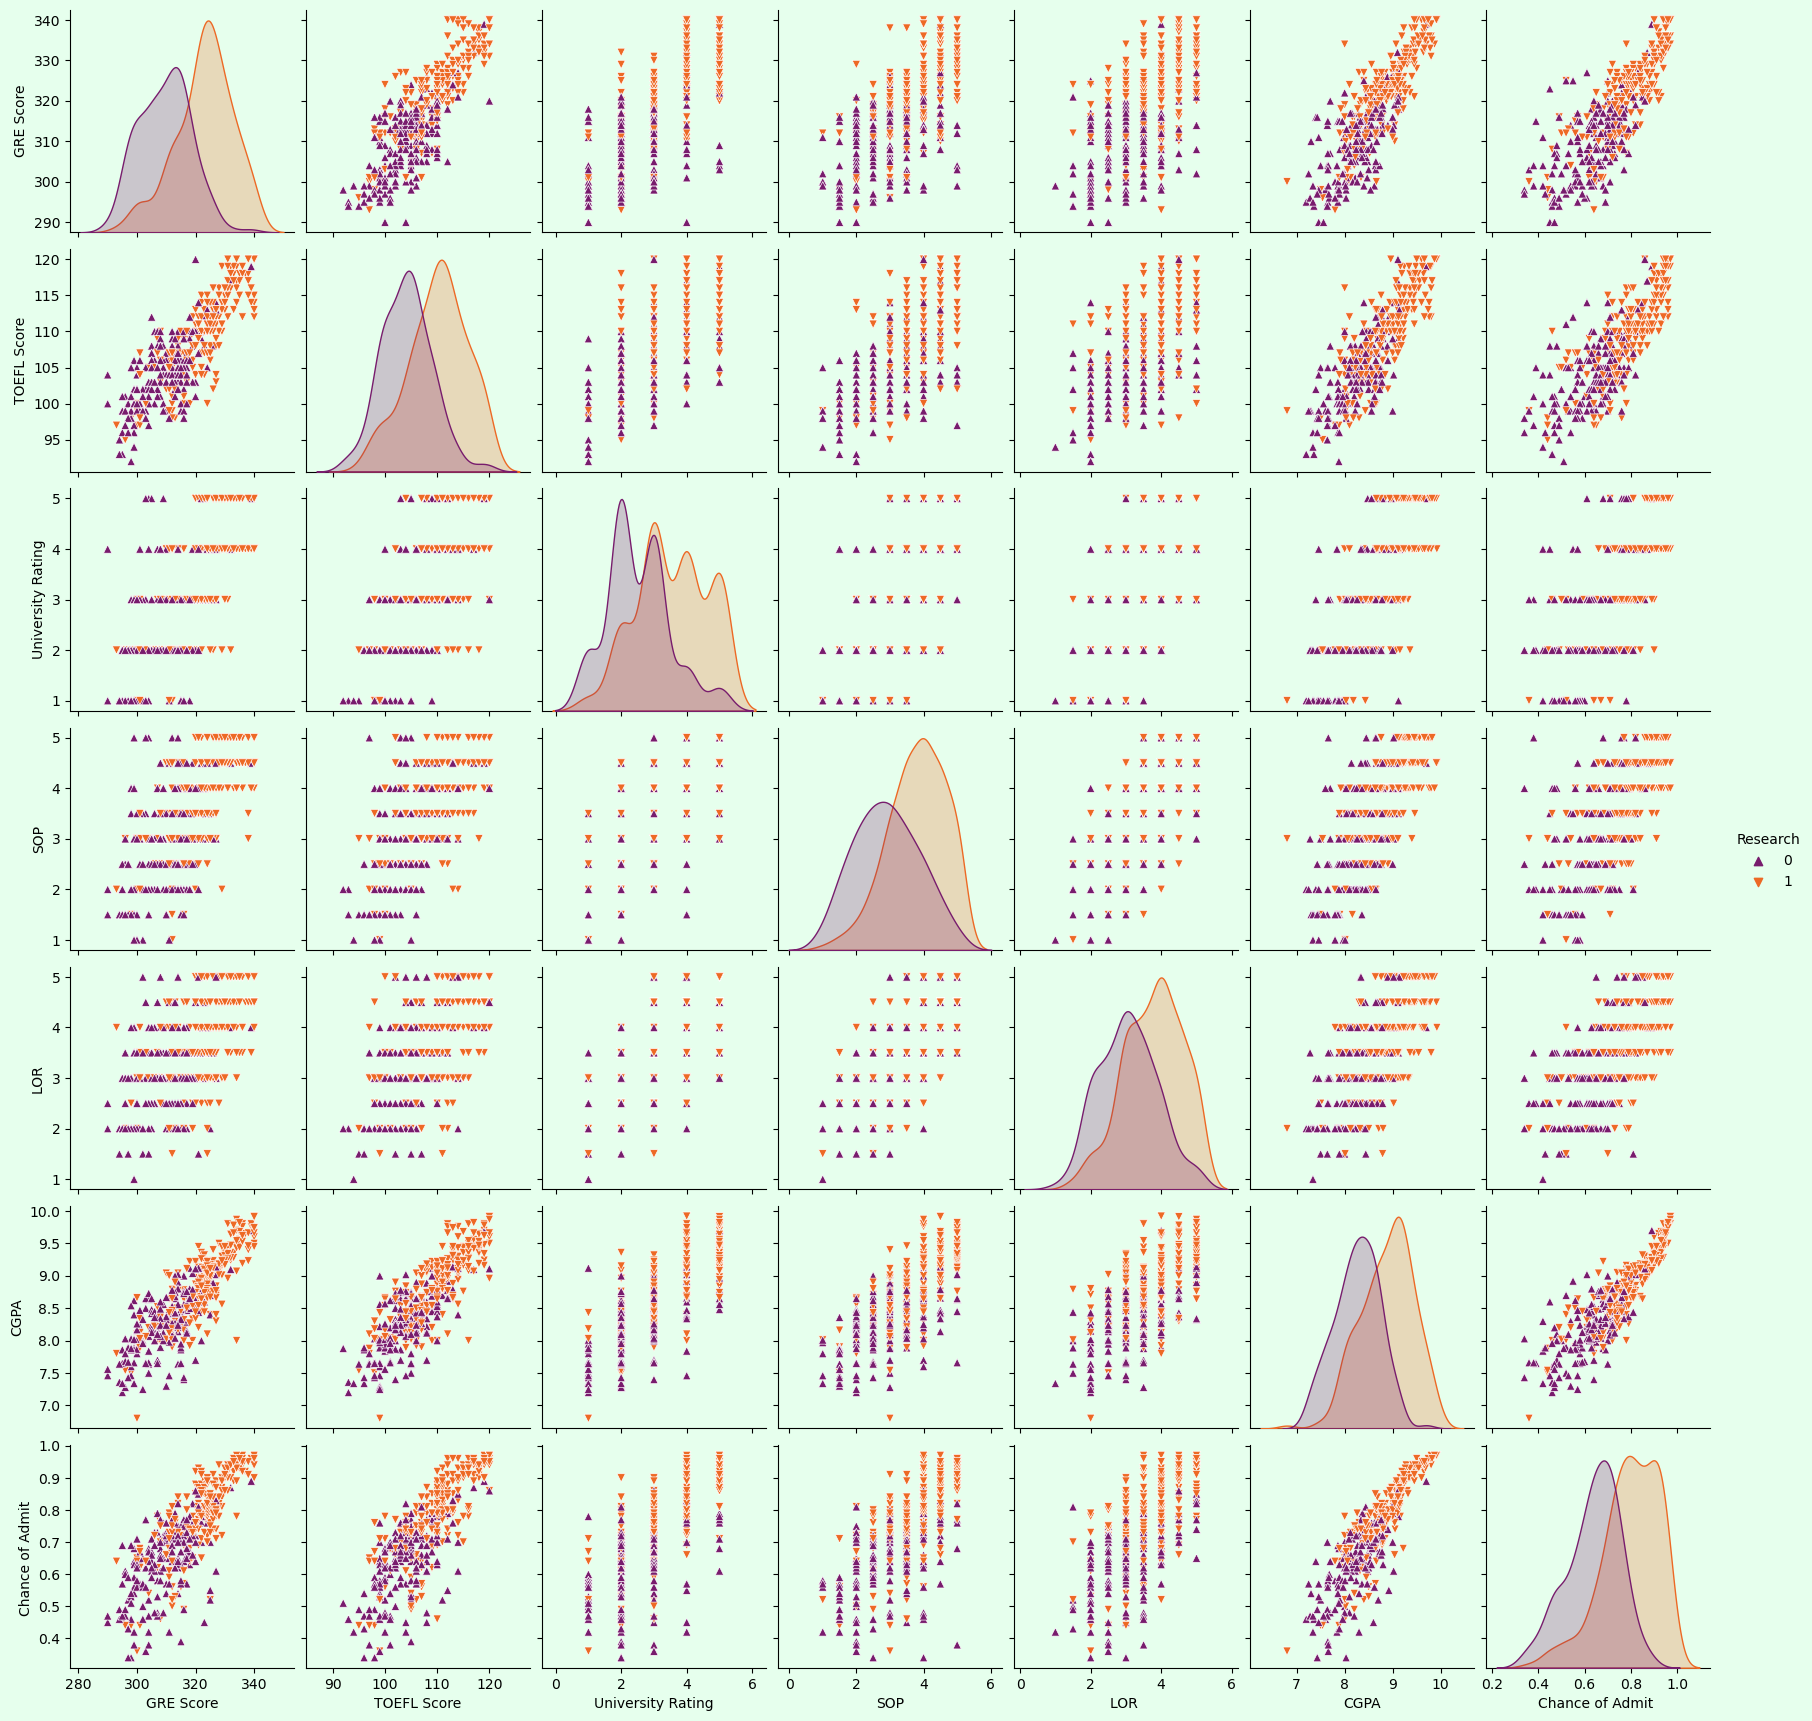

In [8]:
plt.rcParams['axes.facecolor'] = "#e6ffed"
plt.rcParams['figure.facecolor'] = "#e6ffed"
g = sns.pairplot(data=dataset.drop(columns=['Serial No.']),hue='Research',markers=["^", "v"],palette='inferno')

> we notice that :

    - GRE score TOEFL score and CGPA all are linearly related to each other
    - Research Students tend to Score higher by all means

## Step 4: <span style="text-decoration:underline">Split the dataset into dependent/independent variables</span>

In [9]:
# independent variables
x = dataset.iloc[:,1:-1].values
# dependent variables
y = dataset.iloc[:,-1].values

y = y.reshape(len(y),1)

## Step 5:  <span style="text-decoration:underline">Spliting the dataset into thetraining set and test set</span>

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,
                                                   random_state=0)

## Step 6: <span style="text-decoration:underline">Training the Support Vector Regression (SVR) model on training set</span>

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(x_train, y_train)

SVR()

## Step 7: <span style="text-decoration:underline">Predicting The Test set results</span>

In [12]:
y_pred = regressor.predict(x_test)

In [13]:
df = pd.DataFrame({'Real Values':y_test.flatten().tolist(), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,0.71,0.658907
1,0.70,0.672037
2,0.79,0.776991
3,0.73,0.635542
4,0.72,0.696857
...,...,...
75,0.61,0.662136
76,0.69,0.627381
77,0.62,0.679701
78,0.93,0.850487


## Step 8:  <span style="text-decoration:underline">Visualsing the Training set results</span>

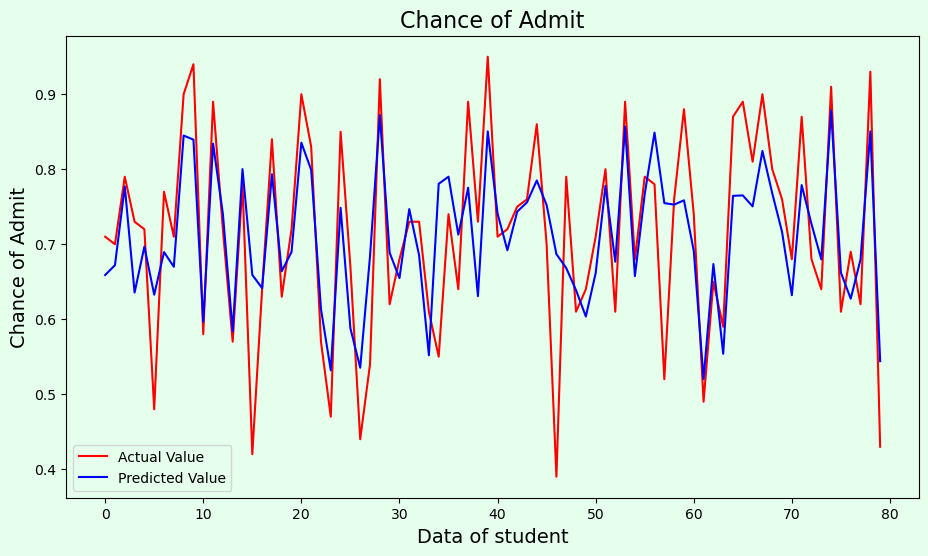

In [14]:
plt.figure(figsize=(11, 6))
plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(y_pred, color='blue', label='Predicted Value')

plt.title('Chance of Admit', fontsize=16)
plt.xlabel('Data of student', fontsize=14)
plt.ylabel('Chance of Admit', fontsize=14)

plt.legend()
plt.show()

## step 10: <span style="text-decoration:underline">model evaluation</span>

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
print('mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 

mean_squared_error :  0.007208649669839301
mean_absolute_error :  0.06505006137961553


## step 11: <span style="text-decoration:underline">Calculating R² with Scikit-Learn</span>

In [16]:
from sklearn.metrics import r2_score
R2_sklearn = r2_score(y_test, y_pred)
print(f"R² (Scikit-Learn Calculation): {R2_sklearn}")

R² (Scikit-Learn Calculation): 0.6032114561904336


## Sources:
----
- scikit-learn.org : https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html
- kaggle : https://www.kaggle.com/datasets/mohansacharya/graduate-admissions
- Machine Learning A-Z: AI, Python & R + ChatGPT Prize [2024] : https://www.udemy.com/course/machinelearning/?couponCode=2021PM20